# Geerts Arbitrator - Egocentric MF-SR

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
os.chdir(sys.path[0]+"/..")
cwd = os.getcwd()
print(cwd)

C:\Users\jrusp\Desktop\GitHub\mixed-coordination-models\sources


In [2]:
from grid_search import random_grid_search, compute_clusters_perfs, plot_two_perfs, plot_all_perfs, plot_local
from grid_search import perform_statical_analyses_pearce, perform_statical_analyses_rodrigo
from experimental_data import get_pearce_experimental_data
from pearce_protocol import perform_group_pearce, plot_pearce, create_path_main_pearce
from exp3_pearce_protocol import perform_group_exp3_pearce

from environments.HexWaterMaze import EnvironmentParams
from agents.agent import AgentsParams

import warnings
warnings.filterwarnings('ignore')

C:\Users\jrusp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Definition of the experimental data to reproduce

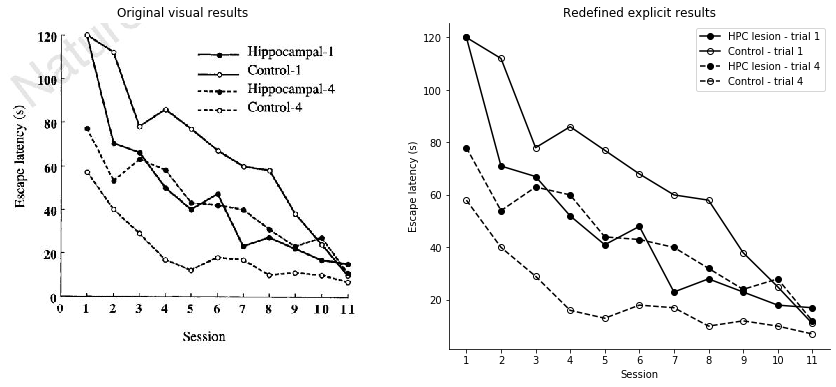

In [3]:
experimental_data_pearce = get_pearce_experimental_data()

## Hyperparameters optimization of Geerts model on Pearce (1998) data

#### Simulation of 2000 datapoints on both experiments

In [5]:
path = "geerts_ego_SR5"

In [5]:
function = "main_pearce"
n_datapoints = 2000
mf_allo = False
dolle = False
HPCmode = "SR"
range_srlr = (0.01, 0.4)
range_qlr = (0.01, 0.4)
range_gamma = (0.7, 0.99)
range_inv_temp = (5, 150)
eta = 0.03

random_grid_search(path, function, n_datapoints, mf_allo, dolle, HPCmode, range_srlr=range_srlr, range_qlr=range_qlr, eta=eta, range_gamma=range_gamma, range_inv_temp=range_inv_temp)

Directory  ../results/geerts_ego_SR5  already exists


#### Clustering of the mean performances of 2000 local groups of datapoints

In [10]:
compute_clusters_perfs(path, 100, experimental_data_pearce, relative=True)

Using 1811 remaining datapoints


#### Removal of clusters that do not validate the required statistical tests

In [247]:
perform_statical_analyses_pearce(path)

Retrieving all agents data
Performing ANOVA


#### Plotting of the sets of parameters associated with the lowest MSE for each 2D bin
White bins means that no datapoints in the bin satisfied all the statistical tests

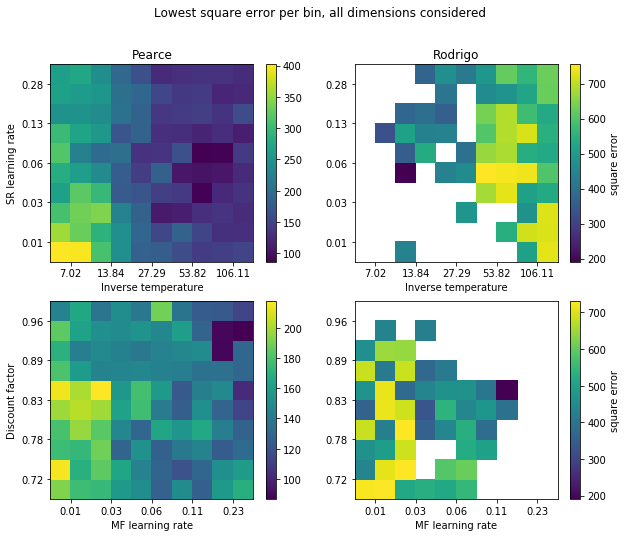

Best three sets of parameters on Pearce's data


,srlr_centroid,qlr_centroid,gamma_centroid,inv_temp_centroid,eta_centroid,se_cluster_pearce,se_cluster_rodrigo_relative
1178,0.08870,0.17514,0.92104,64.41,0.03,86.786295,273.508626
1312,0.09633,0.16984,0.91360,78.47,0.03,88.734646,310.526349
1510,0.05536,0.15991,0.91891,67.32,0.03,89.139351,347.703641


Best three sets of parameters on Rodrigo's data


,srlr_centroid,qlr_centroid,gamma_centroid,inv_temp_centroid,eta_centroid,se_cluster_pearce,se_cluster_rodrigo_relative
1403,0.06900,0.14620,0.85384,12.88,0.03,262.438474,191.181881
607,0.14564,0.03590,0.83514,10.28,0.03,345.942219,331.278823
489,0.06709,0.04267,0.79893,14.33,0.03,287.486728,357.445761


In [38]:
res_df = plot_all_perfs(path, size_plot=10, relative=True) # higher values of p, compared to the next cell

### Awaited performances of the set of parameters at index 1178 and 1403 on respectively Pearce's and Rodrigo's protocol

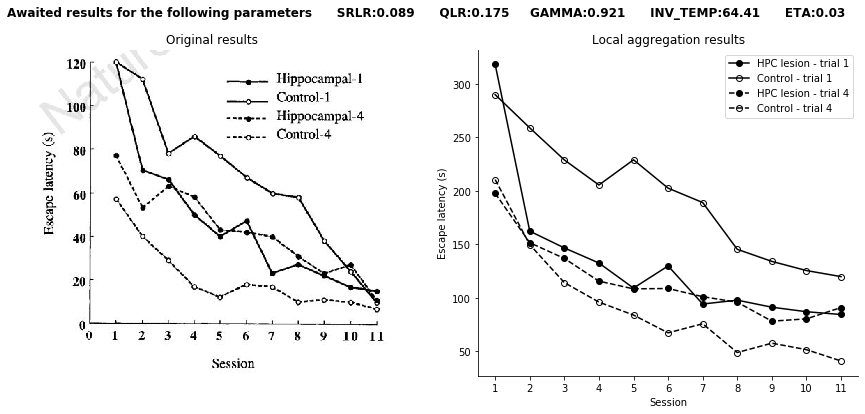

In [40]:
plot_local("main_pearce", res_df, 1178)

# Testing the grid-search predictions: Pearce, Roberts, Good (1998) experiment

## Control agents training

In [6]:
env_params = EnvironmentParams()
env_params.maze_size = 10
env_params.n_sessions = 11
env_params.n_trials = 4
env_params.n_agents = 100
env_params.init_sr = "zero"
env_params.landmark_dist = 4
env_params.time_limit = 500
env_params.starting_states = [243,230,270,257]

ag_params = AgentsParams()
ag_params.mf_allo = False
ag_params.hpc_lr = 0.088
ag_params.q_lr = 0.175
ag_params.inv_temp = 64
ag_params.gamma = 0.92
ag_params.eta = 0.03 # reliability learning rate
ag_params.alpha1 = 0.01
ag_params.beta1 = 0.1
ag_params.A_alpha = 3.2 # Steepness of transition curve MF to SR
ag_params.A_beta = 1.1 # Steepness of transition curve SR to MF
ag_params.HPCmode = "SR"
ag_params.lesion_HPC = False
ag_params.lesion_DLS = False
ag_params.dolle = False

In [9]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100False0.0880.175640.920.030.00010.13.21.14SR500FalseFalseFalse'

Two-way ANOVA on trial and session

                           sum_sq      df           F         PR(>F)
C(session)           1.211365e+07    10.0  115.819367  1.785530e-214
C(trial)             5.710094e+06     3.0  181.981925  3.601858e-111
C(session):C(trial)  1.168064e+06    30.0    3.722645   3.635600e-11
Residual             4.555978e+07  4356.0         NaN            NaN


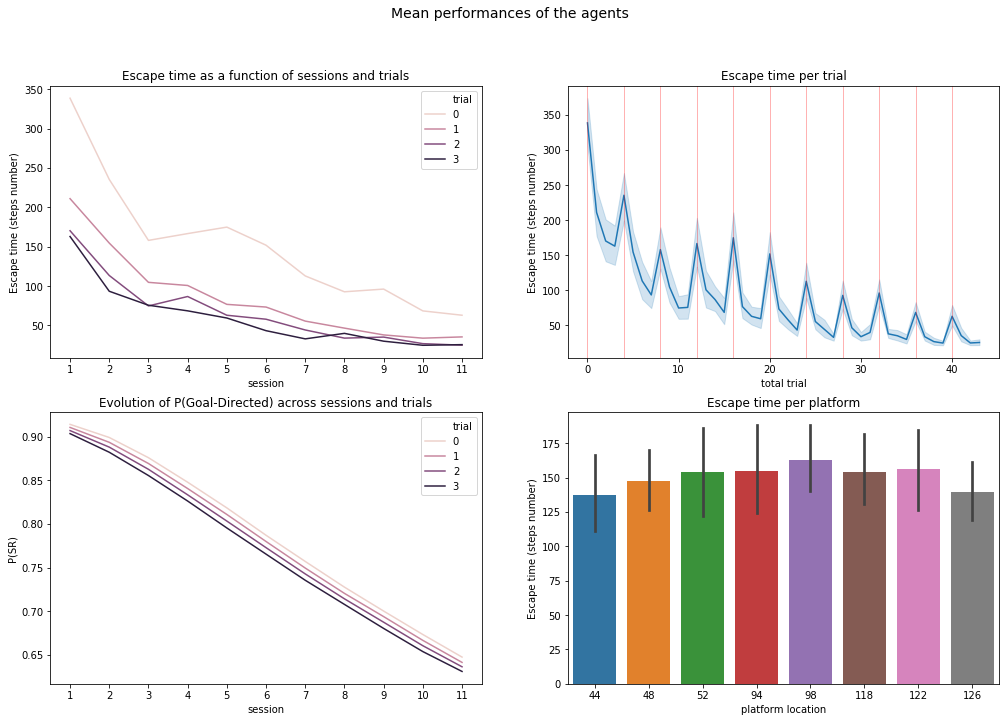

<Figure size 432x288 with 0 Axes>

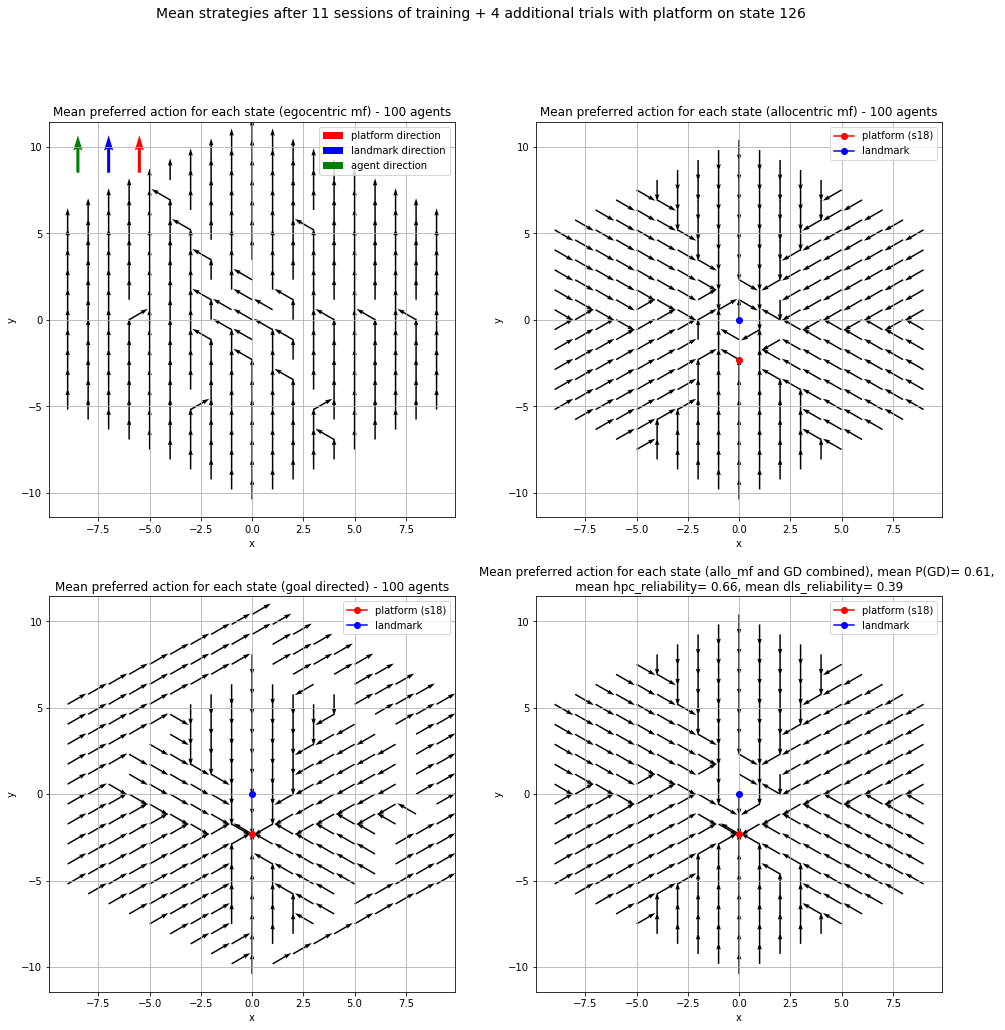

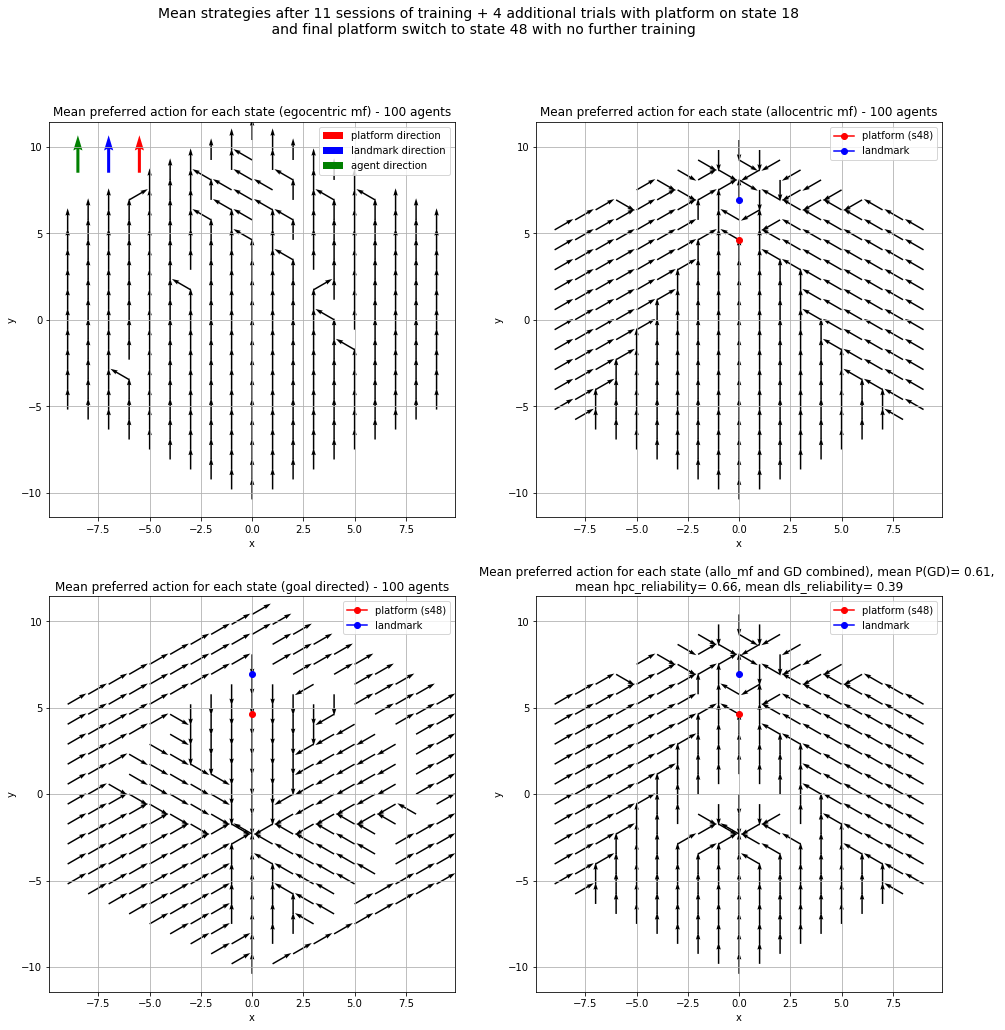

In [313]:
perform_group_pearce(env_params, ag_params)

## Lesioned agents training

In [26]:
ag_params.lesion_HPC = True

In [22]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100False0.0880.175640.920.030.010.13.21.14SR500TrueFalseFalse'

Two-way ANOVA on trial and session

                           sum_sq      df          F         PR(>F)
C(session)           1.227864e+07    10.0  87.367786  9.214471e-165
C(trial)             2.824368e+05     3.0   6.698865   1.655284e-04
C(session):C(trial)  1.050256e+06    30.0   2.491007   1.246530e-05
Residual             6.121907e+07  4356.0        NaN            NaN


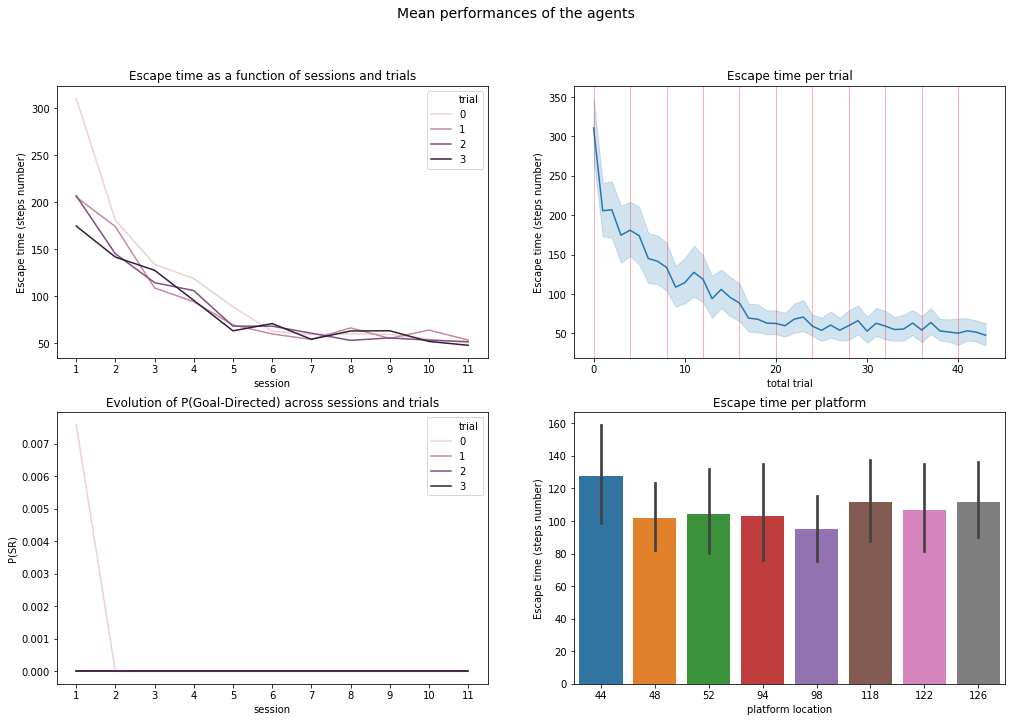

<Figure size 432x288 with 0 Axes>

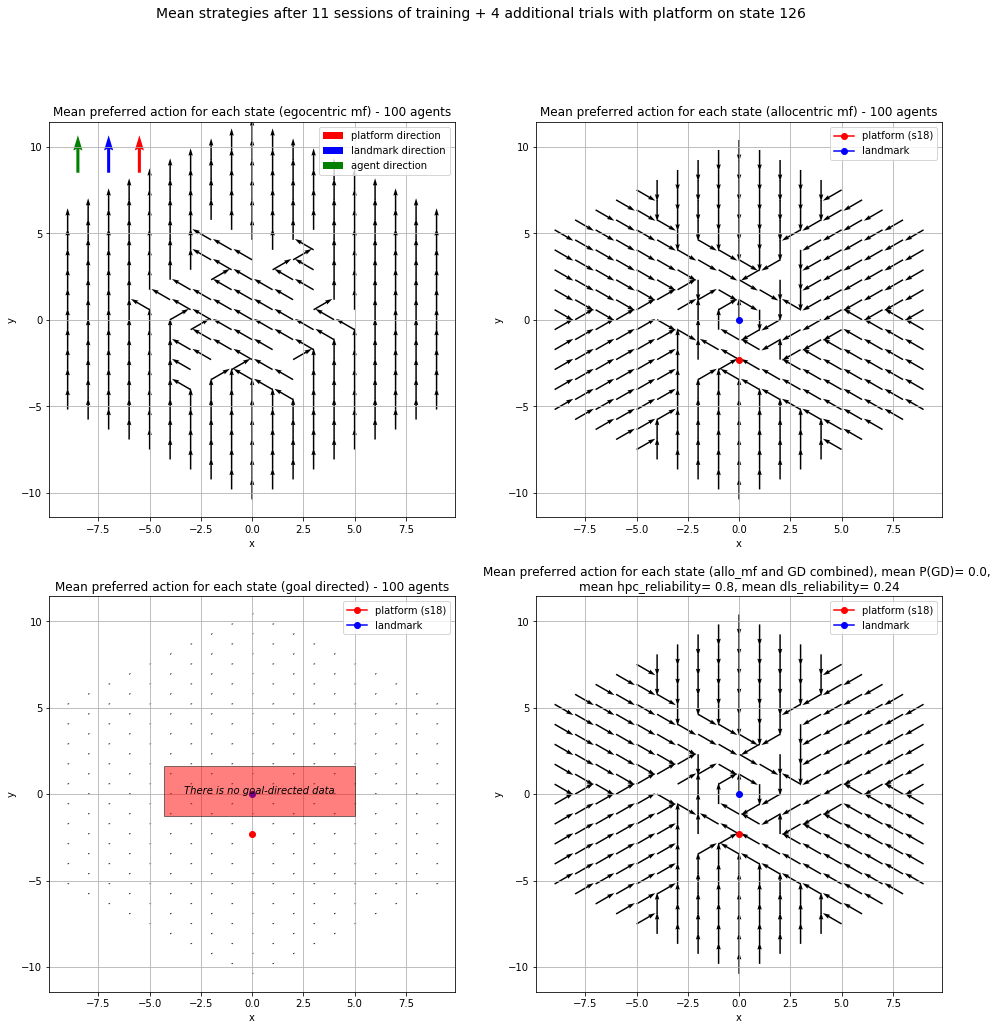

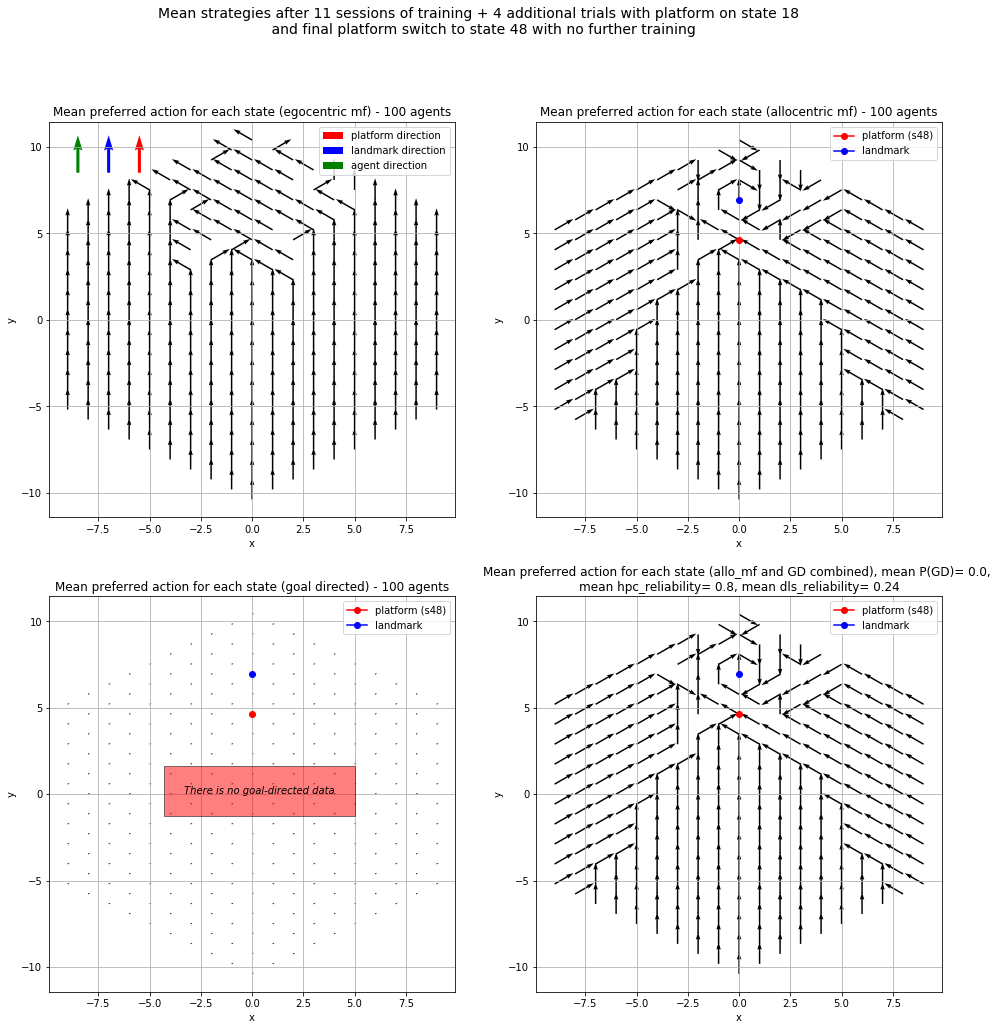

In [315]:
perform_group_pearce(env_params, ag_params)

Mean Square Error:  104.28373340778612


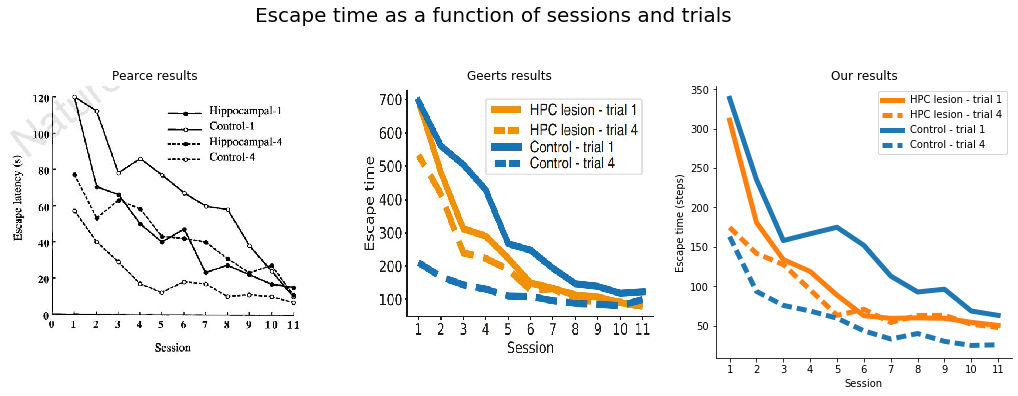

In [7]:
plot_pearce(env_params, ag_params, experimental_data=experimental_data_pearce)